In [ ]:
91.330002 	88.254997 	88.407501

In [ ]:
50 million rows of data(records) and 100 features(columns)-----> 5 billion

In [ ]:
#pick only the useful ones


"""
what if correlation of every feature with target column is almost the same???????????
"""

In [ ]:
PCA
"""
feature selection
dimensionality reduction
"""

In [1]:
import sklearn

In [2]:
import pandas as pd
import seaborn as sns
df=pd.read_csv( "/home/harshit/Downloads/AAPL.csv")
df.sample(5)

,Date,Open,High,Low,Close,Adj Close,Volume
1099,2020-06-26,91.102501,91.330002,88.254997,88.407501,87.964951,205256800
366,2017-07-28,37.472500,37.557499,37.297501,37.375000,35.644234,68854800
1116,2020-07-22,96.692497,97.974998,96.602501,97.272499,96.785568,89001600
732,2019-01-11,38.220001,38.424999,37.877499,38.072498,37.132290,108092800
265,2017-03-06,34.842499,34.942501,34.650002,34.834999,33.085289,87000000


<AxesSubplot:xlabel='Open', ylabel='Close'>

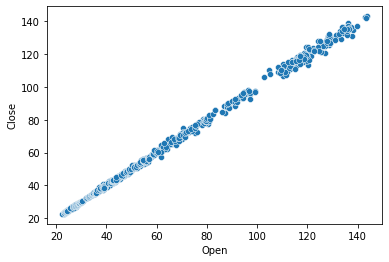

In [3]:
sns.scatterplot( x='Open', y = 'Close', data=df  )

<AxesSubplot:xlabel='Volume', ylabel='Close'>

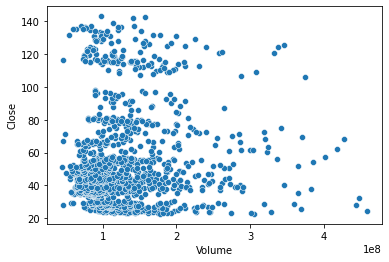

In [4]:
sns.scatterplot( x='Volume', y = 'Close', data=df  )

<AxesSubplot:xlabel='High', ylabel='Close'>

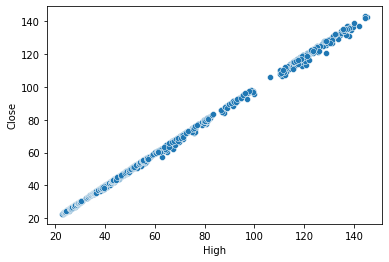

In [5]:
sns.scatterplot( x='High', y = 'Close', data=df  )

In [6]:
features=[  'Open', 'Volume', 'High', 'Low' ]
#close

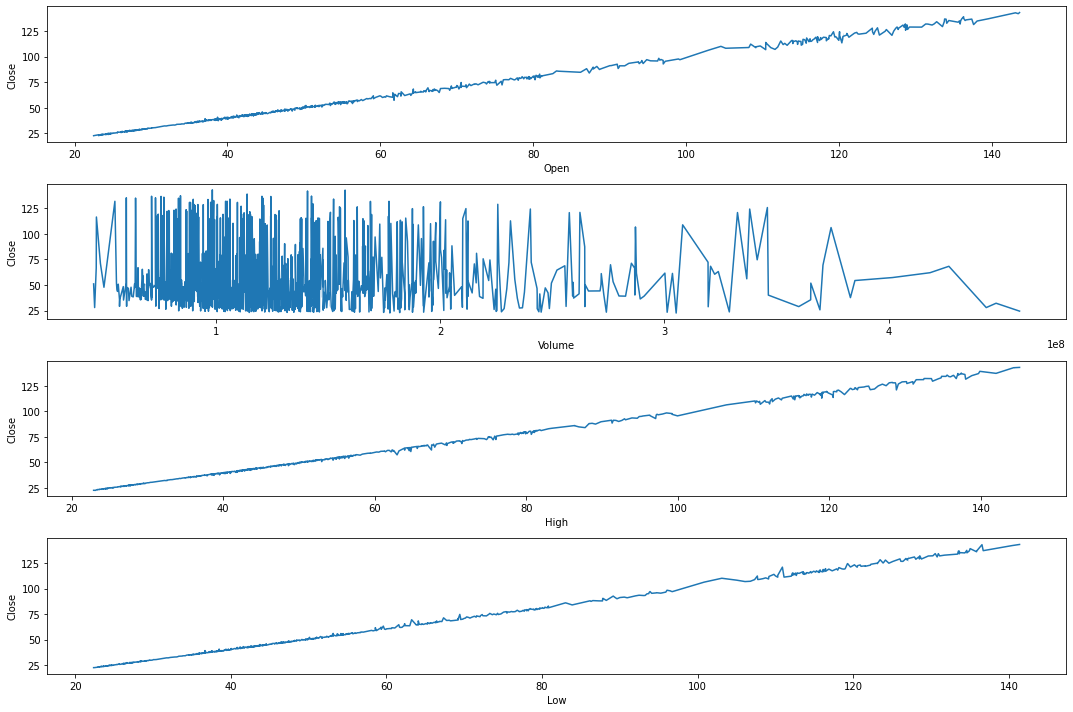

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4,1, figsize=(15,10))

for idx,attribute in enumerate(features):
    sns.lineplot(x=attribute, y='Close',data=df,ax=ax[idx])
    
plt.tight_layout()
plt.show()

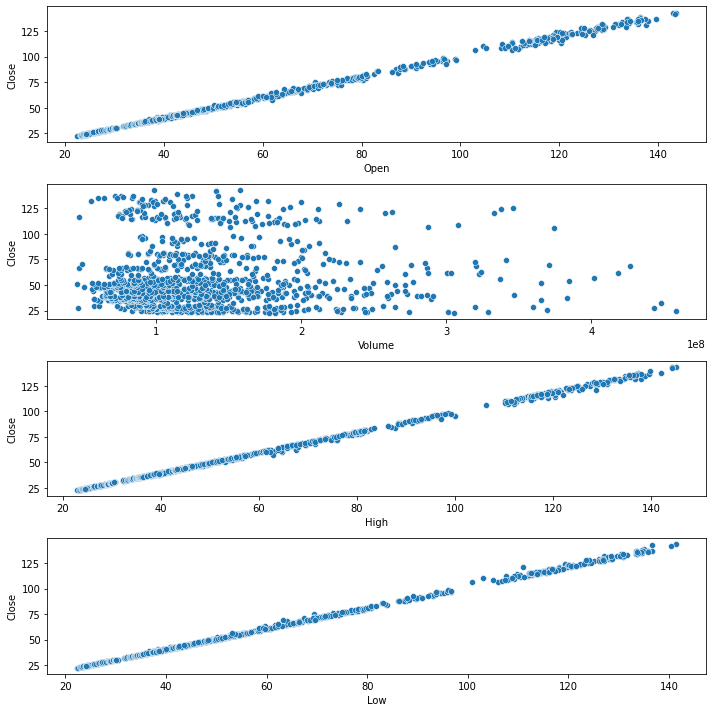

In [8]:
features=[  'Open', 'Volume', 'High', 'Low' ]
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4,1, figsize=(10,10))

for idx,attribute in enumerate(features):
    sns.scatterplot(x=attribute, y='Close',data=df,ax=ax[idx])
    
plt.tight_layout()
plt.show()

In [9]:
df.corr()[['Close']] #coefficient of correlation

,Close
Open,0.999395
High,0.999680
Low,0.999697
Close,1.000000
Adj Close,0.999948
Volume,0.040214


In [10]:
features=df[['Open','Low','High']]
features.sample(2)

,Open,Low,High
299,35.875,35.794998,35.987499
112,24.205,24.105000,24.492500


In [11]:
target=df[['Close']] #target

target.sample(2)

,Close
416,38.959999
986,77.834999


In [12]:
features.shape

(1259, 3)

In [13]:
features.isna().sum()

Open    0
Low     0
High    0
dtype: int64

In [14]:
target.isna().sum()

Close    0
dtype: int64

In [15]:
#dropping records / rows with missing values

#IF ANY COLUMN IN A SINGLE row HAS MISSING VALUE
#IF ALL COLUMNS IN A SINGLE ROW HAVE MISSING VALUE

features.dropna(axis=0, how='any',inplace=True)
target.dropna(axis=0, how='any',inplace=True)


<ipython-input-15-b9eea41cbf96>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(axis=0, how='any',inplace=True)
<ipython-input-15-b9eea41cbf96>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target.dropna(axis=0, how='any',inplace=True)


In [16]:
features.isna().sum()

Open    0
Low     0
High    0
dtype: int64

In [17]:
target.isna().sum()

Close    0
dtype: int64

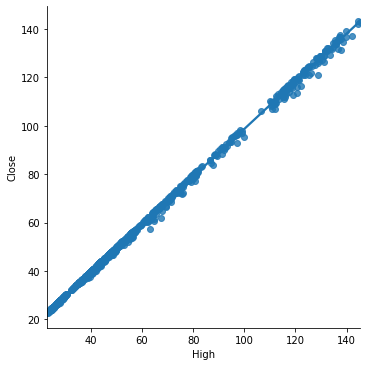

In [19]:
sns.lmplot(x='High',y='Close',data=df,)

In [20]:
features

,Open,Low,High
0,23.754999,23.652500,24.212500
1,24.167500,24.037500,24.552500
2,24.709999,24.022499,24.722500
3,24.000000,23.950001,24.190001
4,24.077499,23.980000,24.225000
...,...,...,...
1254,136.029999,134.919998,136.960007
1255,136.619995,135.850006,137.880005
1256,136.479996,134.399994,136.990005
1257,135.899994,133.770004,136.389999


In [21]:
target

,Close
0,24.160000
1,24.530001
2,24.065001
3,24.010000
4,24.219999
...,...
1254,136.910004
1255,136.009995
1256,135.389999
1257,135.130005


In [22]:
#if you have highly correlated records, go for lower percentage of testing


from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(features,target,test_size=0.2)

In [23]:
x_train

,Open,Low,High
18,25.559999,25.375000,25.570000
378,40.165001,40.035000,40.549999
285,35.927502,35.762501,36.029999
876,50.049999,49.847500,50.882500
806,50.764999,49.777500,50.849998
...,...,...,...
502,39.625000,39.377499,40.972500
26,26.620001,26.475000,26.767500
778,46.557499,46.182499,47.372501
1197,119.440002,117.870003,119.669998


In [24]:
x_test

,Open,Low,High
489,44.312500,43.299999,44.325001
1096,91.000000,90.567497,93.095001
807,52.470001,52.307499,53.827499
891,52.125000,51.665001,52.330002
1017,70.570000,69.430000,75.360001
...,...,...,...
817,46.567501,46.505001,47.937500
141,26.975000,26.877501,27.075001
413,38.407501,38.115002,38.465000
556,41.602501,41.317501,42.299999


In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [26]:
#training step

model.fit(  x_train, y_train ) #multivariate linear regression

LinearRegression()

In [27]:
model.score(x_train, y_train) #R squared value---> 

0.9997012259359366

In [28]:
predicted_values=pd.DataFrame( model.predict( x_test  ) )





predicted_values

,0
0,43.571337
1,92.248806
2,53.358793
3,51.952016
4,73.211341
...,...
247,47.536774
248,26.981788
249,38.244169
250,41.910805


In [29]:
y_test

,Close
489,43.555000
1096,91.632500
807,52.630001
891,52.252499
1017,74.702499
...,...
817,47.730000
141,26.924999
413,38.369999
556,42.275002


In [30]:
y_test.reset_index(inplace=True,drop=True)

y_test
# y_test.drop(columns='index',inplace=True)

,Close
0,43.555000
1,91.632500
2,52.630001
3,52.252499
4,74.702499
...,...
247,47.730000
248,26.924999
249,38.369999
250,42.275002


In [31]:
ans=pd.concat( [predicted_values, y_test],
          ignore_index=True,
          axis=1,
         )
# ans
ans.rename(  columns={0:'Predicted', 1: 'Actual'},inplace=True  )

In [32]:
ans

,Predicted,Actual
0,43.571337,43.555000
1,92.248806,91.632500
2,53.358793,52.630001
3,51.952016,52.252499
4,73.211341,74.702499
...,...,...
247,47.536774,47.730000
248,26.981788,26.924999
249,38.244169,38.369999
250,41.910805,42.275002


In [33]:
model.coef_

array([[-0.48715416,  0.76424593,  0.72375407]])

In [34]:
model.intercept_ #y_intercept

array([-0.01389159])

In [35]:
from sklearn.metrics import r2_score
r2_score(predicted_values, y_test)

0.9997053456046444

In [36]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(predicted_values, y_test)

0.2709800190594849

In [37]:
from sklearn.metrics import mean_squared_error
mean_squared_error(predicted_values, y_test)

0.23519835614563858

In [38]:
#y =  m1x1 + m2x2 + m3x3 + ...... + mnxn + C

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

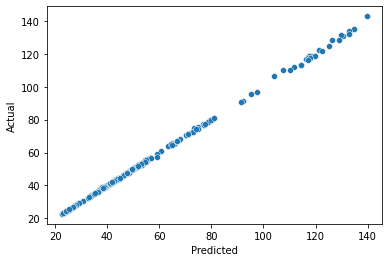

In [39]:
sns.scatterplot( x='Predicted', y='Actual',data=ans  )

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

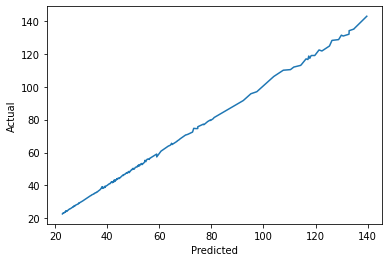

In [40]:
sns.lineplot( x='Predicted', y='Actual',data=ans )

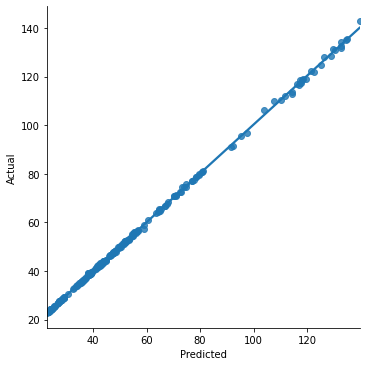

In [41]:
sns.lmplot( x='Predicted', y='Actual',data=ans )

In [42]:
ans.corr()

,Predicted,Actual
Predicted,1.000000,0.999868
Actual,0.999868,1.000000


In [43]:
features.shape

(1259, 3)

In [44]:
"""
we can create csv file or excel file
"""

'\nwe can create csv file or excel file\n'

In [45]:
import numpy as np

l1= [  [311.21, 309.43, 314.65]  ]

data=np.array(   l1  )

In [46]:
model.predict(data) #close

array([[312.58869451]])

In [47]:
def make_prediction():
    f1=float(input("Enter the opening price: "))
    f2=float(input("Enter the Low price: "))
    f3=float(input("Enter the High price: "))
    data=np.array(  [  [f1,f2,f3]  ]  )
    print(f"The closing price based on your input SHOULD BE: {model.predict(data)}")

In [48]:
make_prediction() #function call

Enter the opening price: 343
Enter the Low price: 340
Enter the High price: 350
The closing price based on your input SHOULD BE: [[346.0497678]]
